In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (16,9) 
plt.rcParams["figure.dpi"] = 150 

In [2]:
def _data_import(train_data_loc = "../data/train.csv"):
    return pd.read_csv(train_data_loc)


def _data_clean_up(df):
    df = df.copy()
    boolean_cols_dict = [('Gender', 'Female'),
                         ('Over18', 'Y'),
                         ('OverTime', 'Yes'),
                         ]
    for col in boolean_cols_dict:
        df[col[0]] = (df[col[0]] == col[1]).astype(int)
    df = df.rename(columns={"Gender":"is_female"})
    df = df.drop(columns=['id', 'StandardHours'])
    keep_target = df['DailyRate'] < 3500
    df = df[keep_target]
    return df 

data = _data_clean_up(_data_import())

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1676
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   BusinessTravel            1676 non-null   object
 2   DailyRate                 1676 non-null   int64 
 3   Department                1676 non-null   object
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EducationField            1676 non-null   object
 7   EmployeeCount             1676 non-null   int64 
 8   EnvironmentSatisfaction   1676 non-null   int64 
 9   is_female                 1676 non-null   int64 
 10  HourlyRate                1676 non-null   int64 
 11  JobInvolvement            1676 non-null   int64 
 12  JobLevel                  1676 non-null   int64 
 13  JobRole                   1676 non-null   object
 14  JobSatisfaction           167

In [4]:
non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float'] ]
data[non_numeric_cols].nunique().sort_values(ascending=False)

JobRole           9
EducationField    6
BusinessTravel    3
Department        3
MaritalStatus     3
dtype: int64

In [5]:
for col in non_numeric_cols:
    print("*"*50)
    print(f"{col} has the following unique values:")
    print(data[col].unique())

**************************************************
BusinessTravel has the following unique values:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
**************************************************
Department has the following unique values:
['Research & Development' 'Sales' 'Human Resources']
**************************************************
EducationField has the following unique values:
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
**************************************************
JobRole has the following unique values:
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
**************************************************
MaritalStatus has the following unique values:
['Married' 'Divorced' 'Single']


In [6]:
target_col = 'Attrition'
features = [col for col in data[numeric_cols].columns if col != target_col]
X = data[features]
y = data[target_col]
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y,
                                                   test_size=0.1,
                                                   stratify=y)

print(f"{y.mean()*100:.2f} % of original data is the target class")
print(f"{y_train.mean()*100:.2f} % of training data is the target class")
print(f"{y_test.mean()*100:.2f} % of test data is the target class")

11.93 % of original data is the target class
11.94 % of training data is the target class
11.90 % of test data is the target class


# Questions

How do you want to handle class inbalance?

Simple model is scoring: 88.10


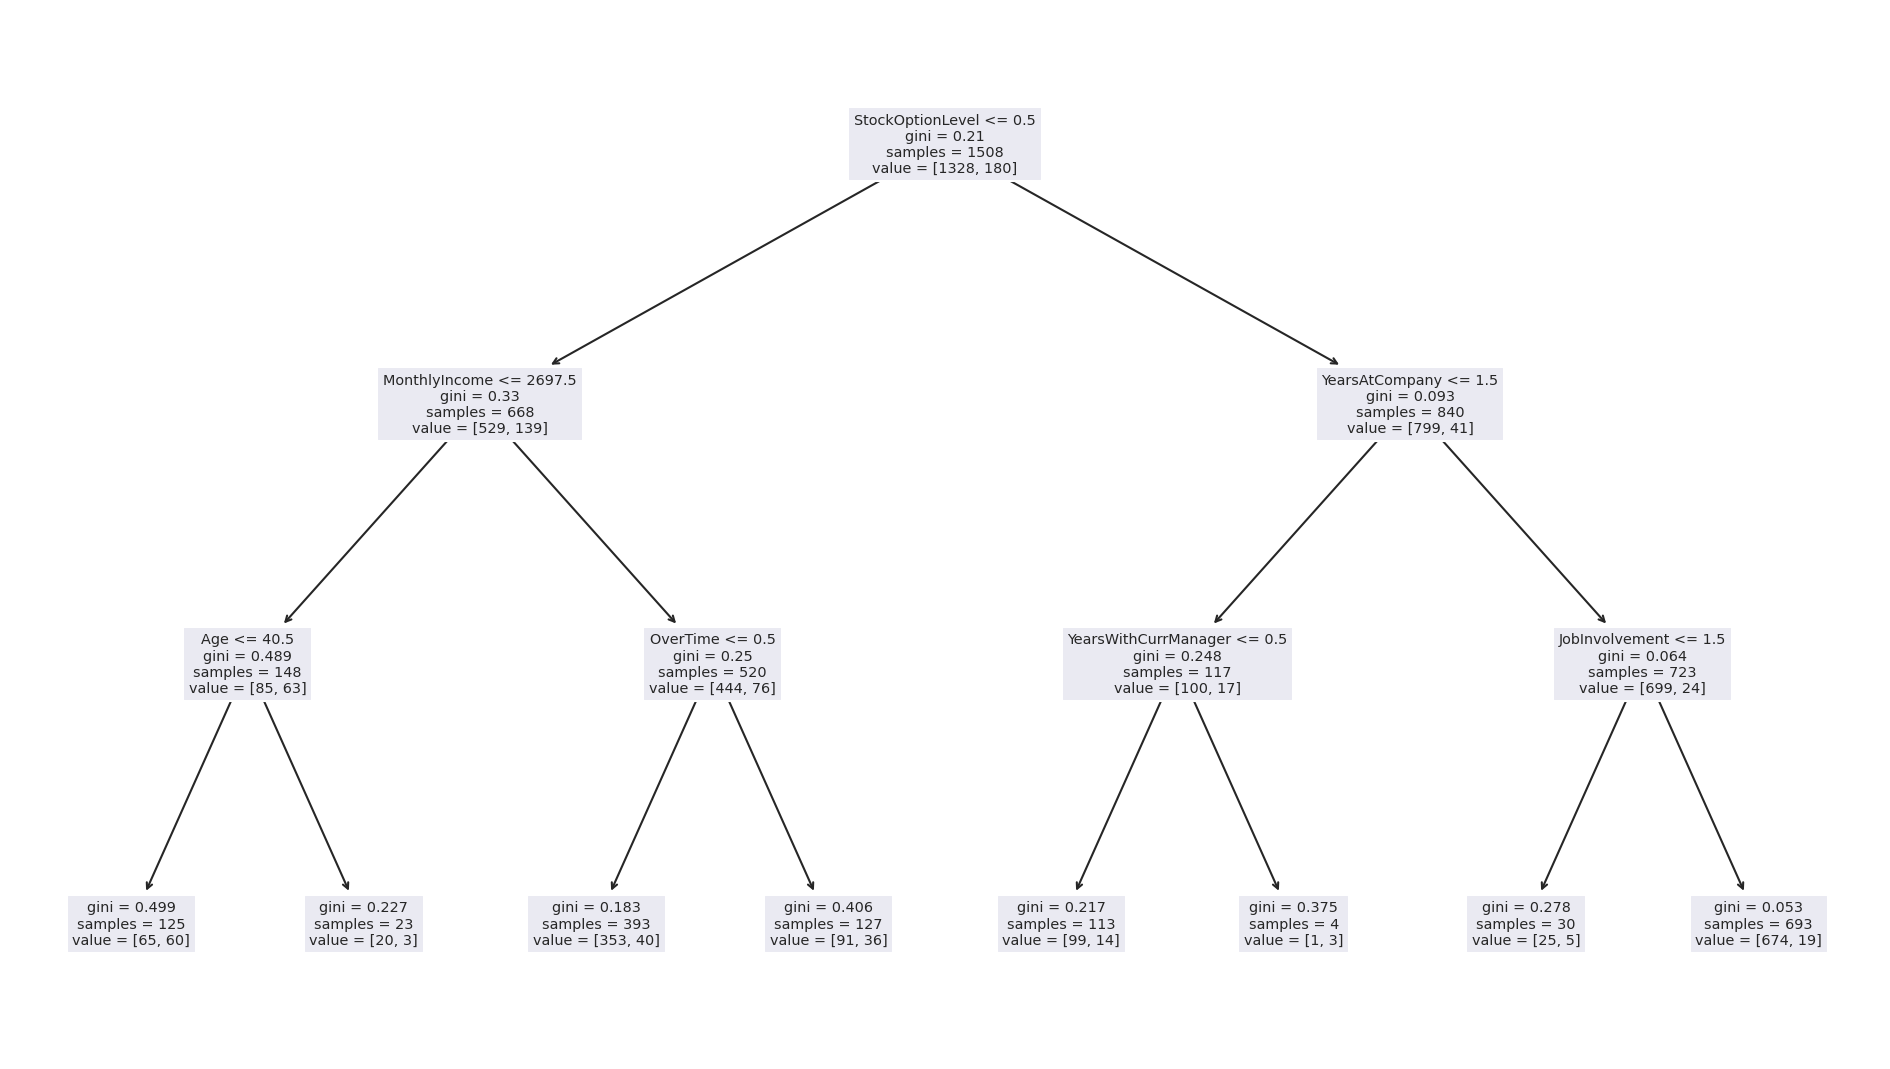

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sklear_tree
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print(f"Simple model is scoring: {tree.score(X_test, y_test)*100:.2f}")
sklear_tree.plot_tree(tree,
                      feature_names = [f for f in tree.feature_names_in_]);